# Ashrut Alok Arora- 210968206

# Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np

import tensorflow as tf
import keras
from keras import layers, models

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

2023-09-04 10:42:00.247366: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-04 10:42:00.270779: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-04 10:42:00.632289: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
#loading the dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Encoding the categorical variables

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### Removing attributes which don't have an impact on Output Variable

In [5]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

<Axes: >

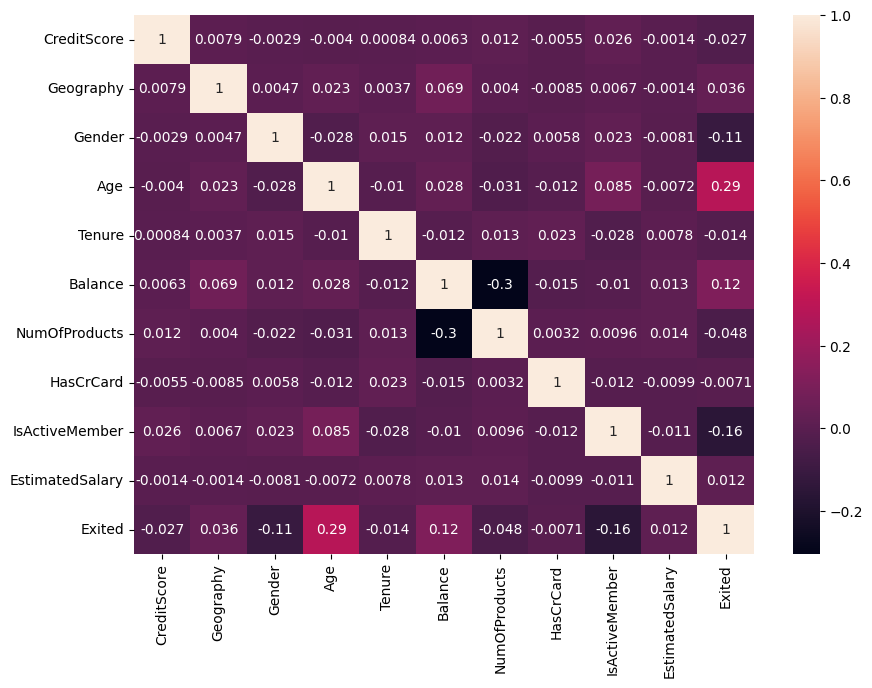

In [8]:
plt.figure(figsize = (10, 7))
sns.heatmap(df.corr(), annot = True)

### Normalizing the data and splitting into training and testing

In [9]:
X = df.drop(['Exited'], axis = 1)
y = df['Exited']
X = (X - X.mean()) / (X.max() - X.min())

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

### Building the neural network

In [10]:
def simple_nn(inputs, numUnits = 128):
    h1 = tf.keras.layers.Dense(numUnits, activation = 'relu')(inputs)
    h2 = tf.keras.layers.Dense(numUnits / 2, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.1))(h1)
    h3 = tf.keras.layers.Dense(numUnits / 4, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.1))(h2)
    output = tf.keras.layers.Dense(1, activation = 'sigmoid')(h3)
    model = tf.keras.Model(inputs = [inputs], outputs = [output])
    return model

## 1. Learning Rate = 0.1, Epochs = 10

In [32]:
inputLayer = tf.keras.layers.Input((11))

model1 = simple_nn(inputLayer)
model1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1), loss = 'binary_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])

In [33]:
history1 = model1.fit(X_train, y_train, epochs = 10, validation_split = 0.15)

Epoch 1/10
226/226 [==============================] - 3s 5ms/step - loss: 0.7979 - accuracy: 0.7946 - precision: 0.4615 - recall: 0.0040 - val_loss: 0.5238 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
226/226 [==============================] - 1s 5ms/step - loss: 0.5295 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4942 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
226/226 [==============================] - 1s 5ms/step - loss: 0.4877 - accuracy: 0.8010 - precision: 0.5795 - recall: 0.1106 - val_loss: 0.4525 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
226/226 [==============================] - 1s 5ms/step - loss: 0.4750 - accuracy: 0.8050 - precision: 0.5758 - recall: 0.1895 - val_loss: 0.4745 - val_accuracy: 0.8196 - val_precision: 0.6165 - val_recall: 0.3142
Epoch 5/10
226/226 [==============================] - 1s 5ms/step - loss

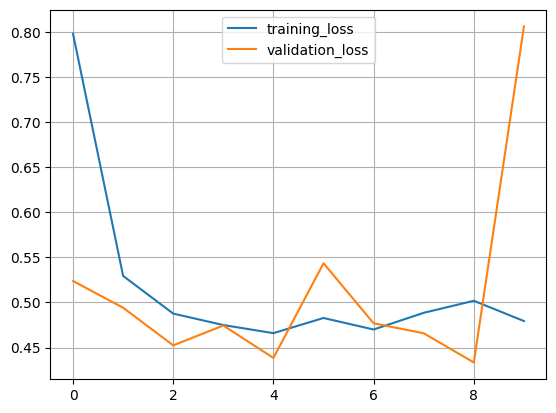

In [34]:
plt.plot(history1.history['loss'], label = 'training_loss')
plt.plot(history1.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.grid(True)

### Validation loss seems more than training loss, so there seems to be overfitting

## 2. Learning Rate = 0.1, Epochs = 20

In [36]:
inputLayer = tf.keras.layers.Input((11))

model2 = simple_nn(inputLayer)
model2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1), loss = 'binary_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])

In [37]:
history1 = model2.fit(X_train, y_train, epochs = 20, validation_split = 0.15)

Epoch 1/20
226/226 [==============================] - 3s 6ms/step - loss: 0.8067 - accuracy: 0.7909 - precision: 0.1957 - recall: 0.0061 - val_loss: 0.5280 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
226/226 [==============================] - 1s 5ms/step - loss: 0.5352 - accuracy: 0.7932 - precision: 0.4724 - recall: 0.0634 - val_loss: 0.4718 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
226/226 [==============================] - 1s 5ms/step - loss: 0.4979 - accuracy: 0.8039 - precision: 0.5444 - recall: 0.2731 - val_loss: 0.5699 - val_accuracy: 0.8031 - val_precision: 0.5521 - val_recall: 0.2031
Epoch 4/20
226/226 [==============================] - 1s 5ms/step - loss: 0.4830 - accuracy: 0.7967 - precision: 0.5115 - recall: 0.2104 - val_loss: 0.4619 - val_accuracy: 0.8055 - val_precision: 0.5219 - val_recall: 0.5939
Epoch 5/20
226/226 [==============================] - 1s 6ms/step - loss: 0.4910 - accur

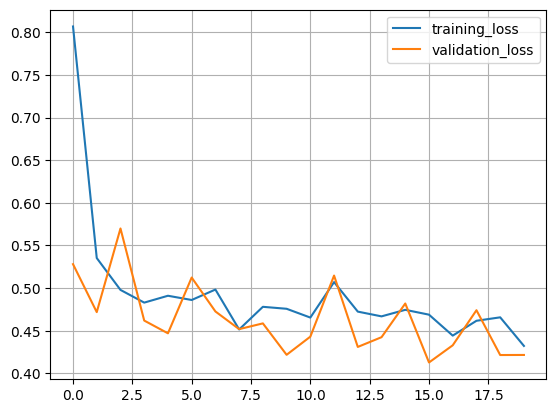

In [38]:
plt.plot(history1.history['loss'], label = 'training_loss')
plt.plot(history1.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.grid(True)

### Validation loss seems to be fluctuating, running more epochs and observing, training and validation losses are decreasing.

## 3.  Learning Rate = 0.1, Epochs = 30

In [40]:
inputLayer = tf.keras.layers.Input((11))

model3 = simple_nn(inputLayer)
model3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1), loss = 'binary_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])

In [41]:
history1 = model3.fit(X_train, y_train, epochs = 30, validation_split = 0.15)

Epoch 1/30
226/226 [==============================] - 3s 6ms/step - loss: 0.8000 - accuracy: 0.7927 - precision: 0.3810 - recall: 0.0162 - val_loss: 0.5224 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
226/226 [==============================] - 1s 5ms/step - loss: 0.5164 - accuracy: 0.7940 - precision: 0.4286 - recall: 0.0101 - val_loss: 0.4930 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/30
226/226 [==============================] - 1s 4ms/step - loss: 0.5149 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5254 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/30
226/226 [==============================] - 1s 4ms/step - loss: 0.4770 - accuracy: 0.8050 - precision: 0.5673 - recall: 0.2104 - val_loss: 0.4809 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/30
226/226 [==============================] - 1s 4ms/ste

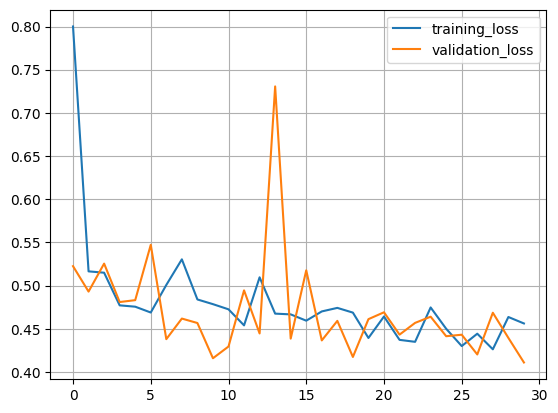

In [42]:
plt.plot(history1.history['loss'], label = 'training_loss')
plt.plot(history1.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.grid(True)

### Validation loss and training loss almost same, so the model is not overfitting

## 4. Learning Rate = 0.01, Epochs = 10

In [44]:
model4 = simple_nn(inputLayer)
model4.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), loss = 'binary_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])
history2 = model4.fit(X_train, y_train, epochs = 10, validation_split = 0.15)

Epoch 1/10
226/226 [==============================] - 4s 5ms/step - loss: 0.8748 - accuracy: 0.7913 - precision: 0.1429 - recall: 0.0034 - val_loss: 0.5078 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
226/226 [==============================] - 1s 4ms/step - loss: 0.5090 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5078 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
226/226 [==============================] - 1s 4ms/step - loss: 0.5091 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5086 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
226/226 [==============================] - 1s 5ms/step - loss: 0.5066 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4813 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
226/226 [============================

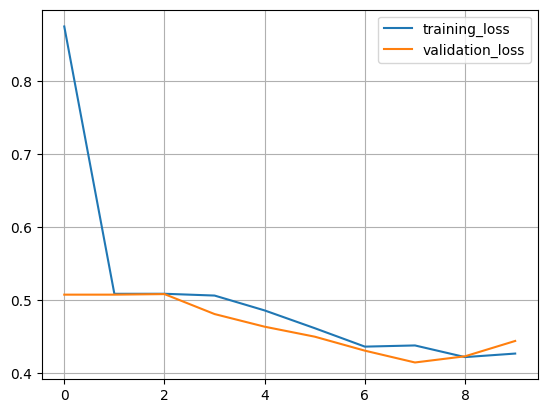

In [45]:
plt.plot(history2.history['loss'], label = 'training_loss')
plt.plot(history2.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.grid(True)

### Model is not overfitting, but the training loss might decrease more, running more epochs

## 5. Learning Rate = 0.01, Epochs = 20

In [46]:
model5 = simple_nn(inputLayer)
model5.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), loss = 'binary_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])
history2 = model5.fit(X_train, y_train, epochs = 20, validation_split = 0.15)

Epoch 1/20
226/226 [==============================] - 3s 7ms/step - loss: 0.8779 - accuracy: 0.7922 - precision: 0.1538 - recall: 0.0027 - val_loss: 0.5101 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
226/226 [==============================] - 1s 7ms/step - loss: 0.5105 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5093 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
226/226 [==============================] - 1s 5ms/step - loss: 0.5033 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4710 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
226/226 [==============================] - 1s 4ms/step - loss: 0.4820 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4558 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/20
226/226 [============================

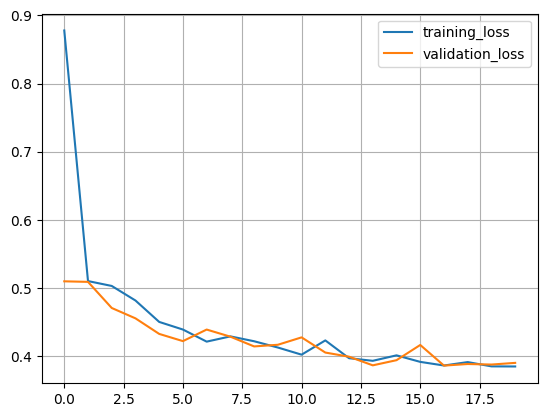

In [47]:
plt.plot(history2.history['loss'], label = 'training_loss')
plt.plot(history2.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.grid(True)

### Model isn't overfiiting, lets train more epochs and observe

## 6. Learning Rate = 0.01, Epochs = 30

In [48]:
#lr = 0.01, epochs = 30
model6 = simple_nn(inputLayer)
model6.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), loss = 'binary_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])
history2 = model6.fit(X_train, y_train, epochs = 30, validation_split = 0.15)

Epoch 1/30
226/226 [==============================] - 3s 7ms/step - loss: 0.8670 - accuracy: 0.7945 - precision: 0.4000 - recall: 0.0027 - val_loss: 0.5109 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
226/226 [==============================] - 1s 6ms/step - loss: 0.5099 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5065 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/30
226/226 [==============================] - 2s 8ms/step - loss: 0.4995 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4675 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/30
226/226 [==============================] - 2s 10ms/step - loss: 0.4697 - accuracy: 0.7954 - precision: 0.6190 - recall: 0.0088 - val_loss: 0.4487 - val_accuracy: 0.8212 - val_precision: 0.6364 - val_recall: 0.2950
Epoch 5/30
226/226 [==============================] - 2s 7ms/st

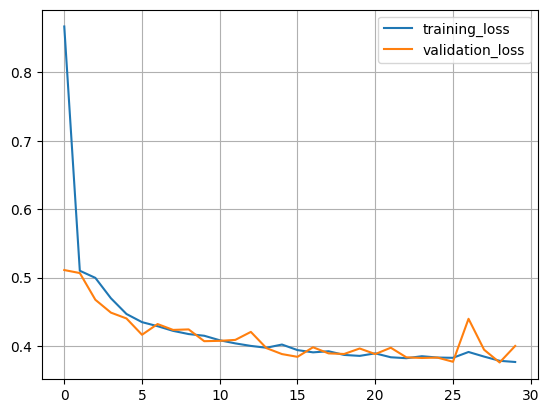

In [49]:
plt.plot(history2.history['loss'], label = 'training_loss')
plt.plot(history2.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.grid(True)

### Validation loss  fluctuating at the end, should stop around 23-25 epochs.

## 7. Learning Rate = 0.001, Epochs = 10

In [50]:
model7 = simple_nn(inputLayer)
model7.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])
history3 = model7.fit(X_train, y_train, epochs = 10, validation_split = 0.15)

Epoch 1/10
226/226 [==============================] - 5s 9ms/step - loss: 3.7497 - accuracy: 0.7939 - precision: 0.3125 - recall: 0.0034 - val_loss: 0.7107 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
226/226 [==============================] - 2s 7ms/step - loss: 0.5539 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5112 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
226/226 [==============================] - 2s 8ms/step - loss: 0.5093 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5071 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
226/226 [==============================] - 2s 8ms/step - loss: 0.5080 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5070 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
226/226 [============================

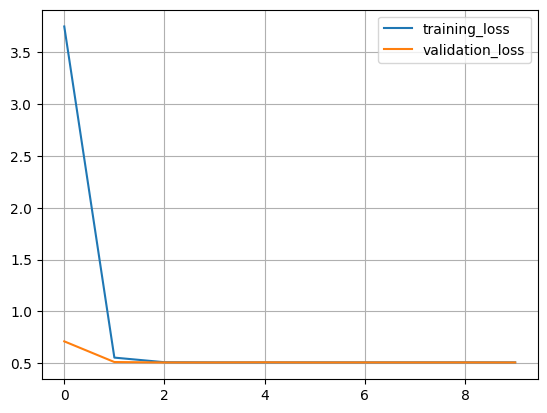

In [51]:
plt.plot(history3.history['loss'], label = 'training_loss')
plt.plot(history3.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.grid(True)

### The very low learning rate seems to have made the learning process slow

## 8. Learning Rate = 0.001, Epochs = 20

In [52]:
model8 = simple_nn(inputLayer)
model8.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])
history3 = model8.fit(X_train, y_train, epochs = 20, validation_split = 0.15)

Epoch 1/20
226/226 [==============================] - 5s 7ms/step - loss: 3.8727 - accuracy: 0.7913 - precision: 0.0690 - recall: 0.0013 - val_loss: 0.7210 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
226/226 [==============================] - 1s 6ms/step - loss: 0.5559 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5091 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
226/226 [==============================] - 1s 6ms/step - loss: 0.5088 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5069 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
226/226 [==============================] - 2s 7ms/step - loss: 0.5082 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5072 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/20
226/226 [============================

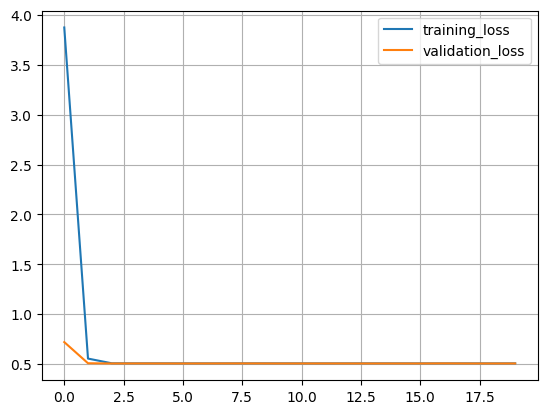

In [53]:
plt.plot(history3.history['loss'], label = 'training_loss')
plt.plot(history3.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.grid(True)

## 9. Learning Rate = 0.001, Epochs = 30

In [54]:
#lr = 0.001, epochs = 20
model9 = simple_nn(inputLayer)
model9.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])
history3 = model9.fit(X_train, y_train, epochs = 30, validation_split = 0.15)

Epoch 1/30
226/226 [==============================] - 4s 9ms/step - loss: 3.8544 - accuracy: 0.7924 - precision: 0.2069 - recall: 0.0040 - val_loss: 0.7373 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
226/226 [==============================] - 1s 6ms/step - loss: 0.5608 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5109 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/30
226/226 [==============================] - 2s 9ms/step - loss: 0.5087 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5076 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/30
226/226 [==============================] - 2s 7ms/step - loss: 0.5082 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5069 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/30
226/226 [============================

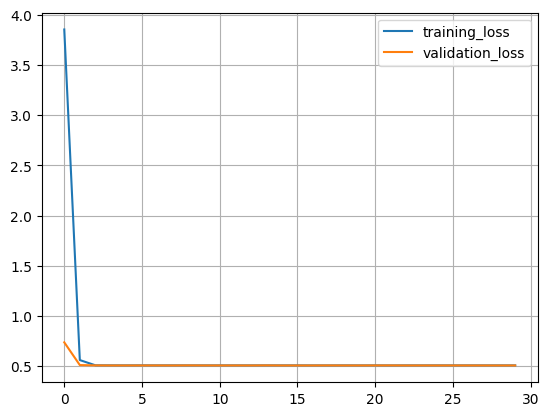

In [55]:
plt.plot(history3.history['loss'], label = 'training_loss')
plt.plot(history3.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.grid(True)